# Figure 4: Biolog Analyses

<div style="text-align: justify"> 
We characterized the sequenced clones isolated from our final and starting population using the biolog plates. Biolog plates contain wells with different media culture composition aimed at characterizing bacteria by its growth profile. It allows us to understand the impact of the genomic changes acquired with a phenotypic fingerprint. 
 </div>

In [15]:
#Libraries
library("tidyverse")
library("ggpubr")
library("pheatmap")
library("ComplexHeatmap")
library("FactoMineR")
library("factoextra")
library("UpSetR")
library("ComplexHeatmap")
library("pca3d")
library("gplots")
library("cowplot")
library("latex2exp")
library("ggcorrplot")

source("../r/eefe_functions.R")

## PCA of the Biolog data

In [75]:
#Read and prepare the data
data606 = read.csv("../../data/normalized606Wells86_94RemovedBiologData.csv")
data607 = read.csv("../../data/normalized607Wells86_94RemovedBiologData.csv")
wells = read.csv("../../data/gen_biolog.csv")
wells =  wells %>% filter(Well %in% colnames(data606))
# Read the strategies file
strategy = read.csv("../../data/StrategyTable.csv") %>% select(Name,Strategy)
data606 = inner_join(data606,strategy, by = "Name") %>% select(1:5,Strategy,everything())
data607 = inner_join(data607,strategy, by = "Name") %>% select(1:5,Strategy,everything())
colnames(data606)[7:98] = as.character(wells$Assay)
colnames(data607)[7:98] = as.character(wells$Assay)
write.csv(data606,"Annotated_606.csv")
write.csv(data607,"Annotated_607.csv")

### 606P

In [241]:
# PCA plot with concentration ellipses
data606$Merged =  paste(data606$Treatment,data606$Condition,sep="") 
data606 = data606 %>% dplyr::select(Merged,everything())
ColFactor =  mutate(data606,Colors = ifelse(Treatment == "Ancestor", Merged, Condition))

# Log transform
dat = data606[,-c(1:7)]
colnames(dat) = wells$Assay
rownames(dat) = make.unique(paste(data606$Name,data606$Condition,sep="-"),sep="-")
logdat = log1p(dat)

# PCA
res.pca = PCA(logdat, scale.unit = F, graph = F)
scores =cbind(data606[,c(1:7)],res.pca$ind$coord)
write.csv(scores,"606_scores.csv")

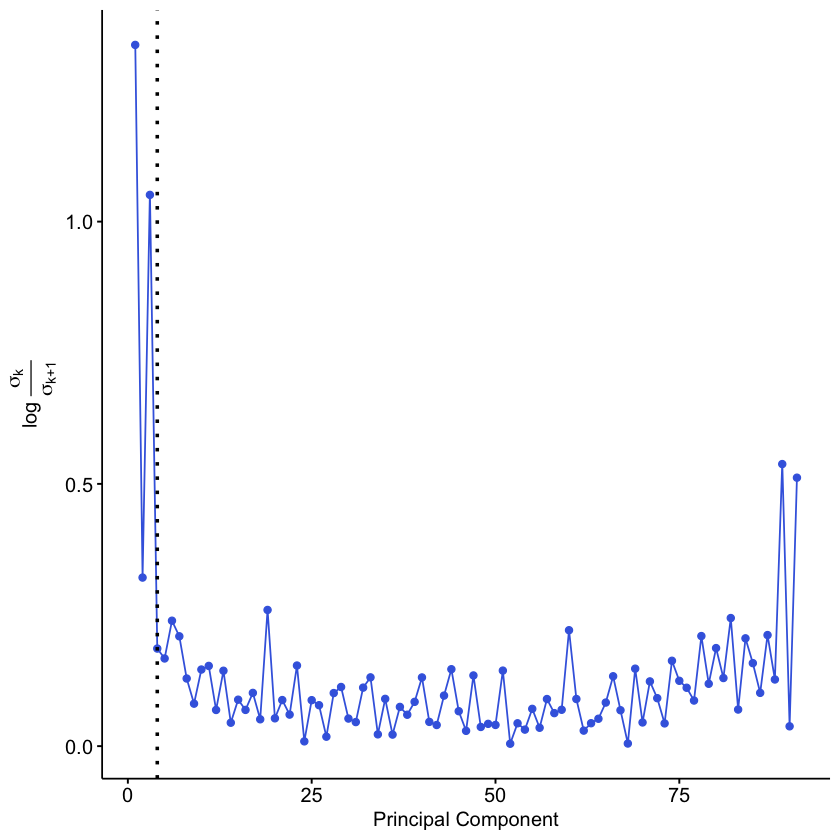

In [229]:
# Talus plot for the informative principal components
eigenvalues = res.pca$eig[,1]
cut = 4
#pdf("Talus_606.pdf")
TalPlot(eigenvalues,cut)
#dev.off()

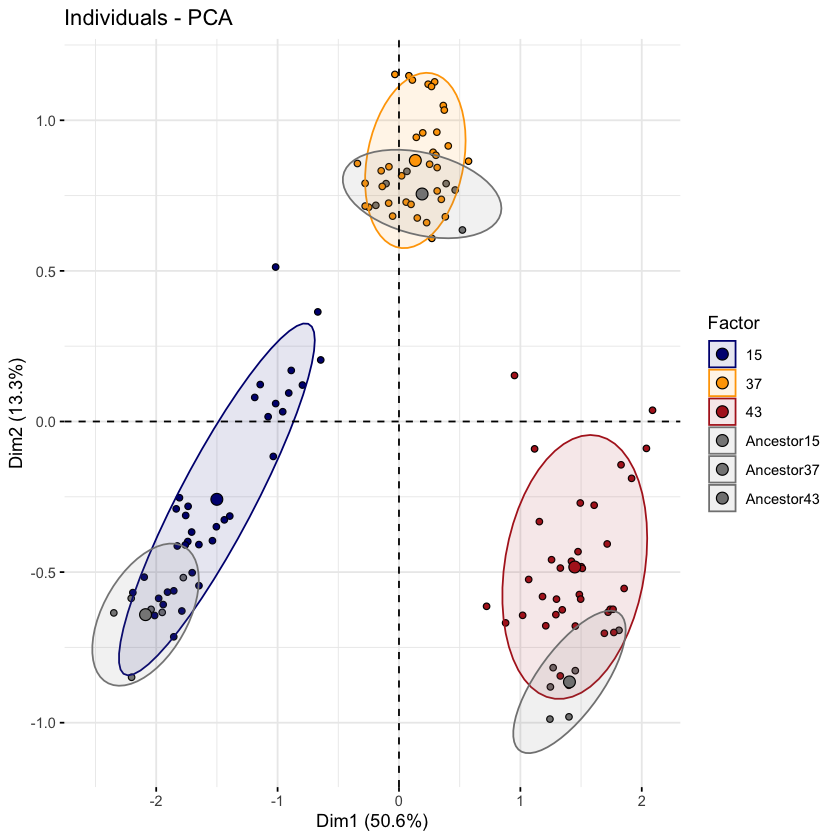

In [205]:
# PCA plot
#pdf("606_pca.pdf")
fviz_pca_ind(res.pca,
             axes = c(1,2),
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = "black", # color by groups
             palette = c("navy","orange","firebrick","grey53","grey52","grey51"), 
             addEllipses = T, label = "var",
             col.var = "black", repel = TRUE,
             legend.title = "Factor",
             pointshape = 21,
             pointsize = 1.5,
             fill.ind = as.character(ColFactor$Colors),  ellipse.level = 0.8
) 
#dev.off()

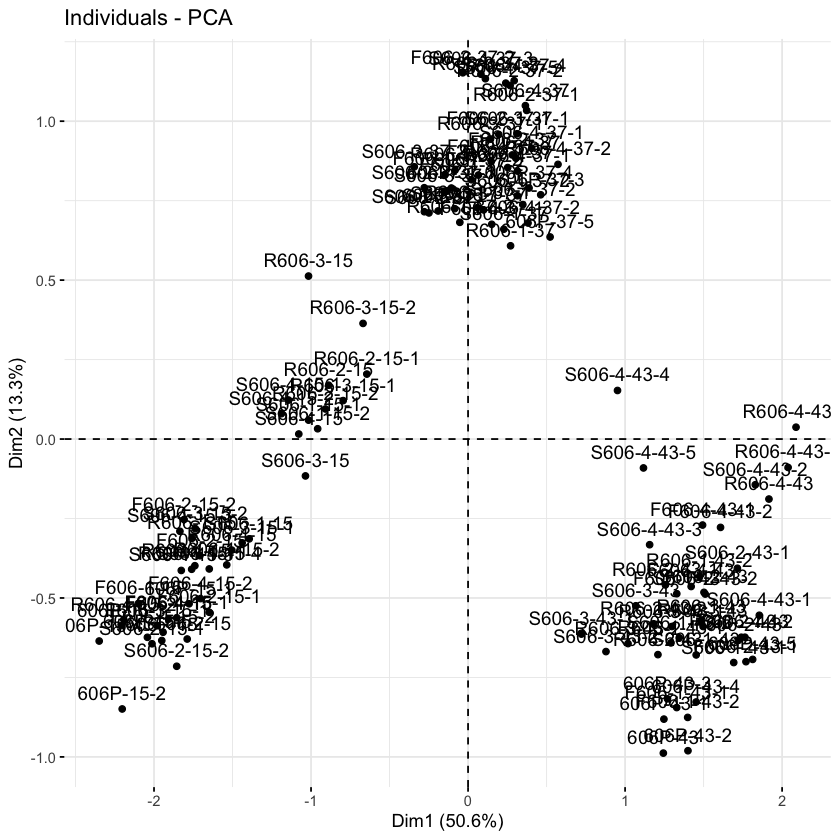

In [177]:
fviz_pca_ind(res.pca)

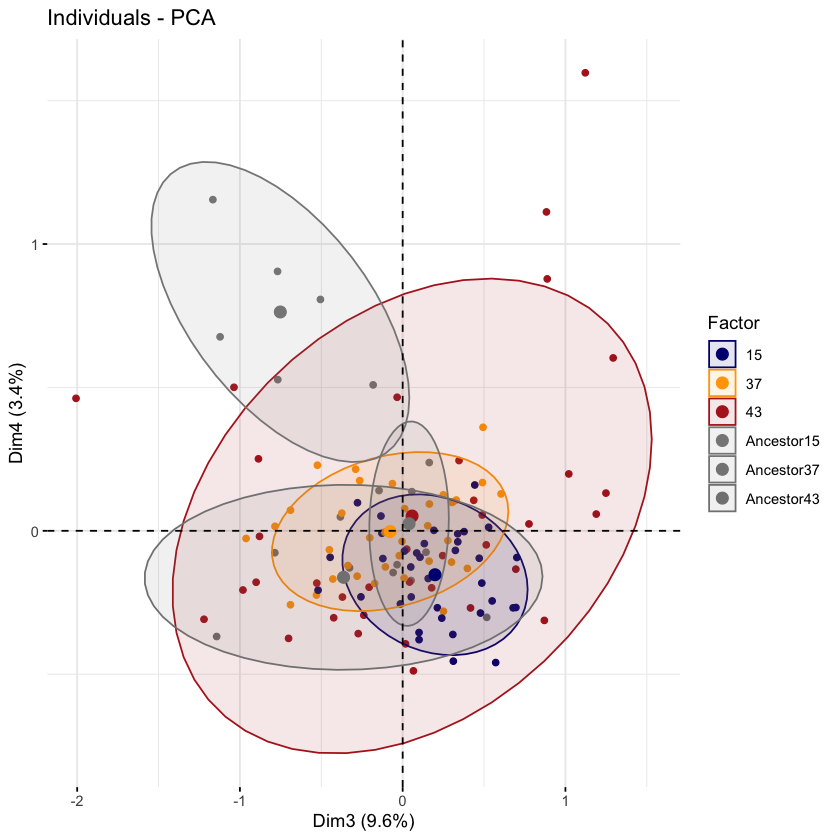

In [178]:
# PCA second PC
#pdf("606_pca34.pdf")
fviz_pca_ind(res.pca,
             axes = c(3,4),
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = as.character(ColFactor$Colors), # color by groups
             palette = c("navy","orange","firebrick","grey53","grey52","grey51"), 
             addEllipses = T, label = "var",
             col.var = "black", repel = TRUE,
             legend.title = "Factor",
             pointshape = 21,
             pointsize = 1.5,
             fill.ind = as.character(ColFactor$Colors),  ellipse.level = 0.8
) 
#dev.off()

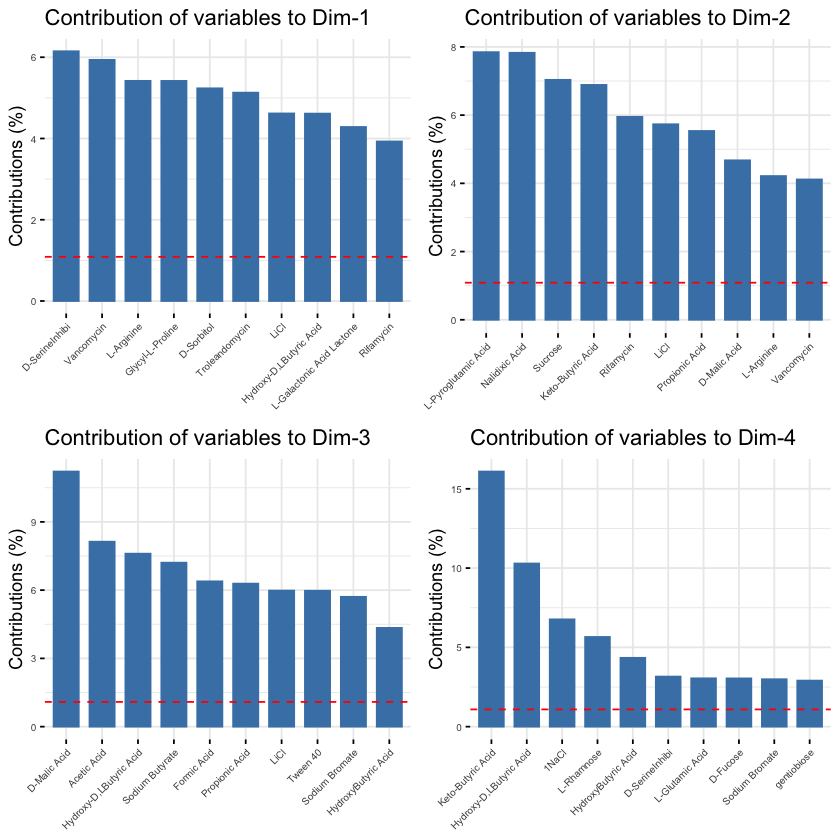

In [179]:
p1 = fviz_contrib(res.pca, choice = "var", axes =1, top = 10) + theme(axis.text=element_text(size=6))
p2 = fviz_contrib(res.pca, choice = "var", axes =2, top = 10) + theme(axis.text=element_text(size=6))
p3 = fviz_contrib(res.pca, choice = "var", axes =3, top = 10) + theme(axis.text=element_text(size=6))
p4 = fviz_contrib(res.pca, choice = "var", axes =4, top = 10) + theme(axis.text=element_text(size=6))
#pdf("606_Contributions.pdf")
plot_grid(p1, p2, p3,p4,labels = c('', '',"",""))
#dev.off()

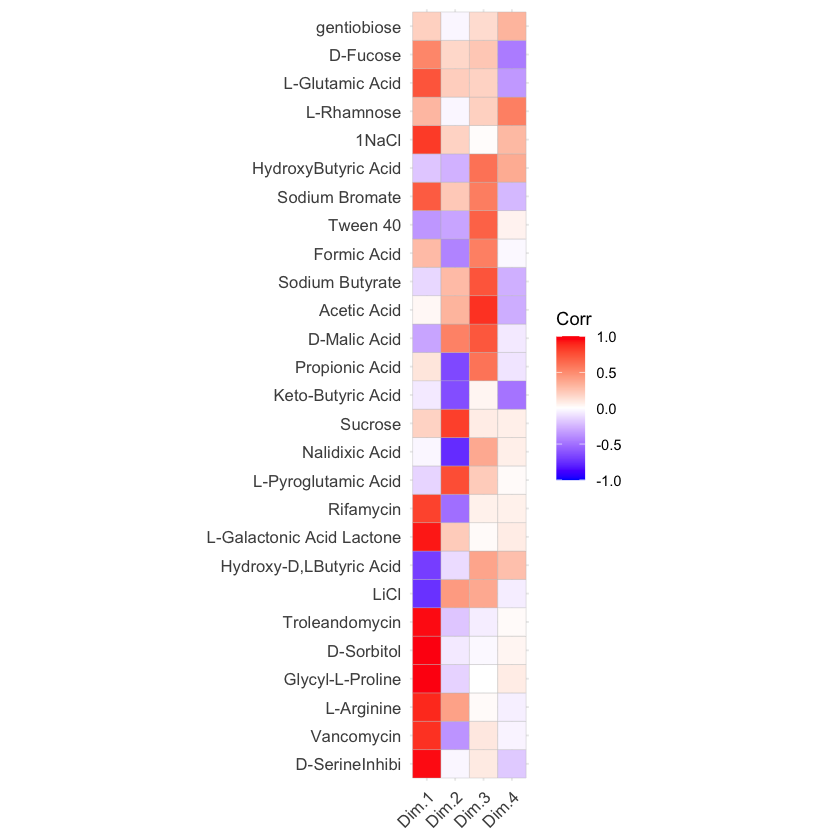

In [182]:
vint1 = p1$data %>% arrange(-contrib) %>% top_n(contrib,n=10)
vint2 = p2$data %>% arrange(-contrib) %>% top_n(contrib,n=10)
vint3 = p3$data %>% arrange(-contrib) %>% top_n(contrib,n=10)
vint4 = p4$data %>% arrange(-contrib) %>% top_n(contrib,n=10)
vintmes = unique(c(as.character(vint1$name),as.character(vint2$name),
                   as.character(vint3$name),as.character(vint4$name)))
correlacions = res.pca$var$cor[vintmes,1:4]
# Plot
#pdf("606_TopCorrelation.pdf")
ggcorrplot(t(correlacions), tl.cex  = 10)
#dev.off()

pdf 
  2

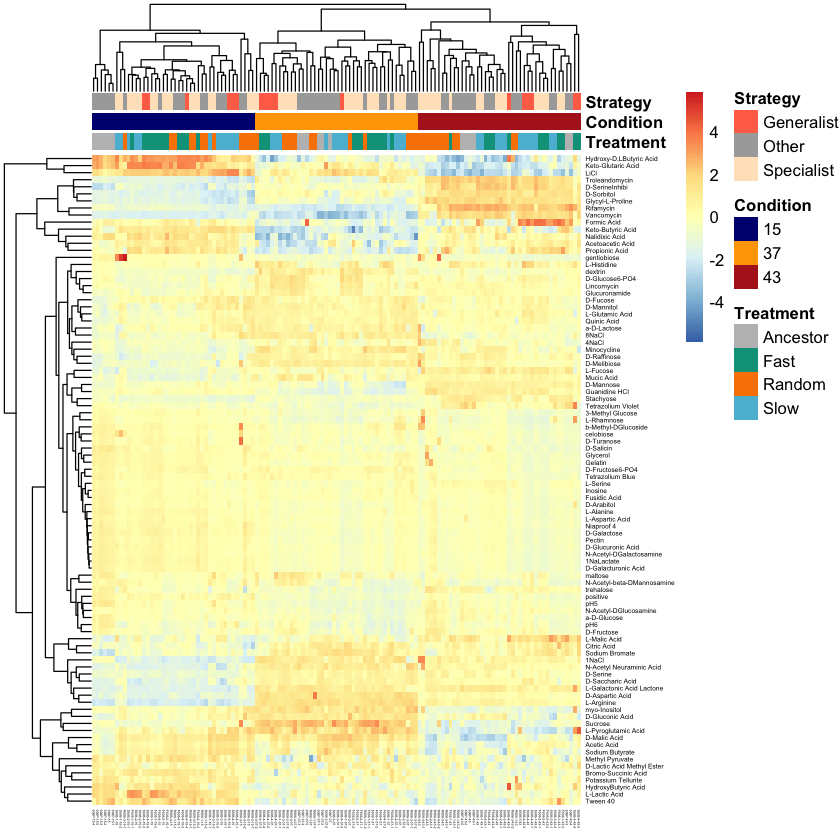

In [149]:
test2 = dat
annotations = as.data.frame(data606[,1:7])
rownames(annotations) = rownames(dat)
annotations = annotations[,5:7]
annotations$Condition = as.factor(annotations$Condition)
annotation_colors = list(Treatment = c(Ancestor="gray",Fast = "#00A08A", Random = '#F98400',Slow ='#5BBCD6'),
                         Condition = c(`15`="navy",`37`="orange",`43`="firebrick"),
                        Strategy = c(Generalist = "coral1",Other = "darkgray",Specialist = "bisque1"))

hmp = pheatmap(t(test2), scale = "column", annotation_col = annotations, 
         border_color = T,fontsize_row=4,fontsize_col=2, annotation_colors = annotation_colors)

save_pheatmap_pdf(hmp, filename = paste("606_hmp.pdf",sep=""))

### REL 607

In [242]:
# PCA plot with concentration ellipses
data607$Merged =  paste(data607$Treatment,data607$Condition,sep="") 
data607 = data607 %>% dplyr::select(Merged,everything())
ColFactor =  mutate(data607,Colors = ifelse(Treatment == "Ancestor", Merged, Condition))

# Log transform
dat = data607[,-c(1:7)]
colnames(dat) = wells$Assay
rownames(dat) = make.unique(paste(data607$Name,data607$Condition,sep="-"),sep="-")
logdat = log1p(dat)

# PCA
res.pca = PCA(logdat, scale.unit = F, graph = F)
scores =cbind(data607[,c(1:7)],res.pca$ind$coord)
write.csv(scores,"607_scores.csv")

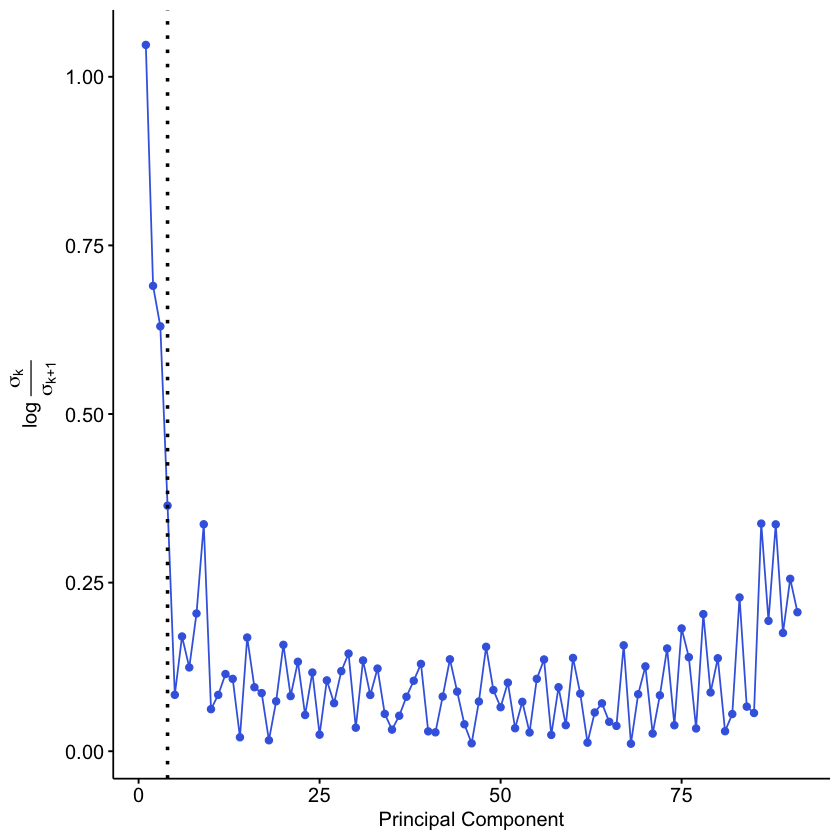

In [197]:
# Talus plot for the informative principal components
eigenvalues = res.pca$eig[,1]
cut = 4
#pdf("Talus_607.pdf")
TalPlot(eigenvalues,cut)
#dev.off()

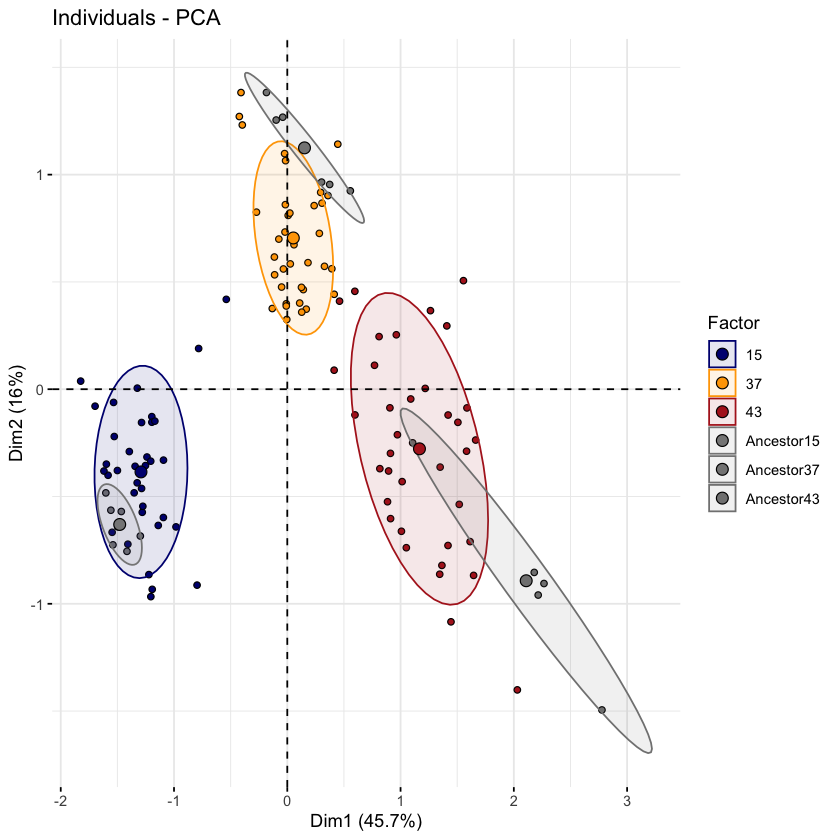

In [200]:
#pdf("607_pca.pdf")
fviz_pca_ind(res.pca,
             axes = c(1,2),
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = "black", # color by groups
             palette = c("navy","orange","firebrick","grey53","grey52","grey51"), 
             addEllipses = T, label = "var",
             col.var = "black", repel = TRUE,
             legend.title = "Factor",
             pointshape = 21,
             pointsize = 1.5,
             fill.ind = as.character(ColFactor$Colors),  ellipse.level = 0.7
)
#dev.off()

There is not enough power to establish any sort of bias in the number of mutations

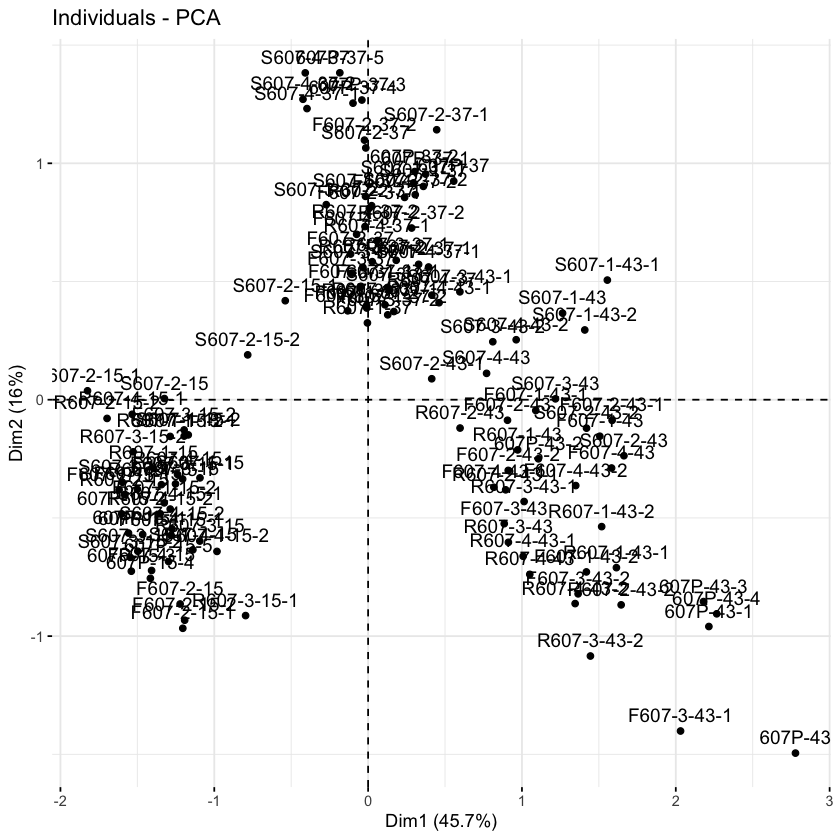

In [186]:
fviz_pca_ind(res.pca)

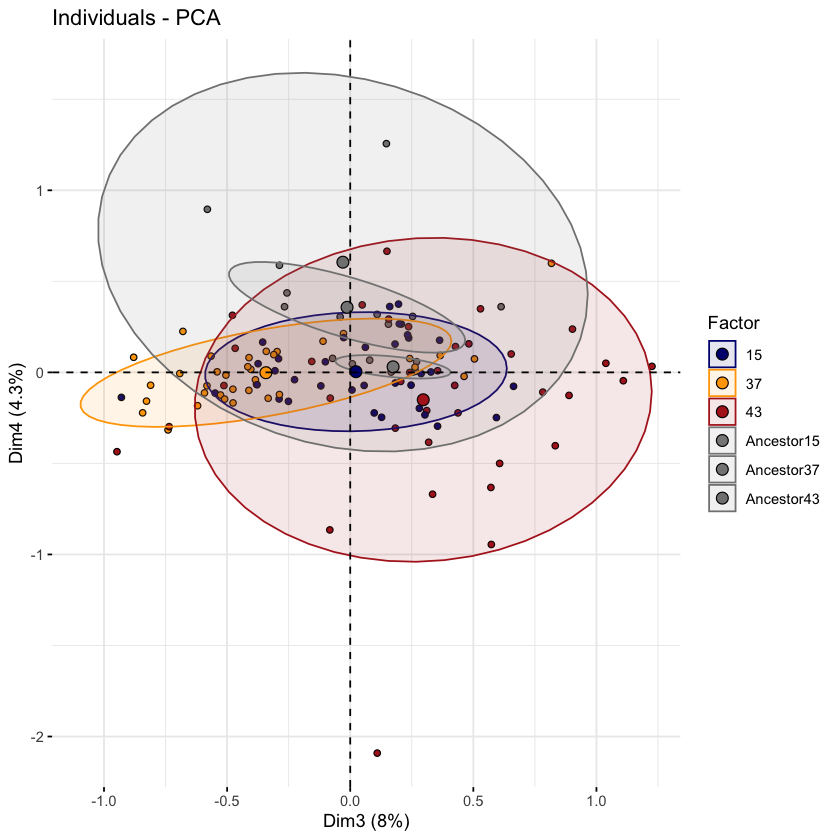

In [195]:
# PCA second PC
#pdf("607_pca34.pdf")
fviz_pca_ind(res.pca,
             axes = c(3,4),
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = "black", # color by groups
             palette = c("navy","orange","firebrick","grey53","grey52","grey51"), 
             addEllipses = T, label = "var",
             col.var = "black", repel = TRUE,
             legend.title = "Factor",
             pointshape = 21,
             pointsize = 1.5,
             fill.ind = as.character(ColFactor$Colors),  ellipse.level = 0.8
) 
#dev.off()

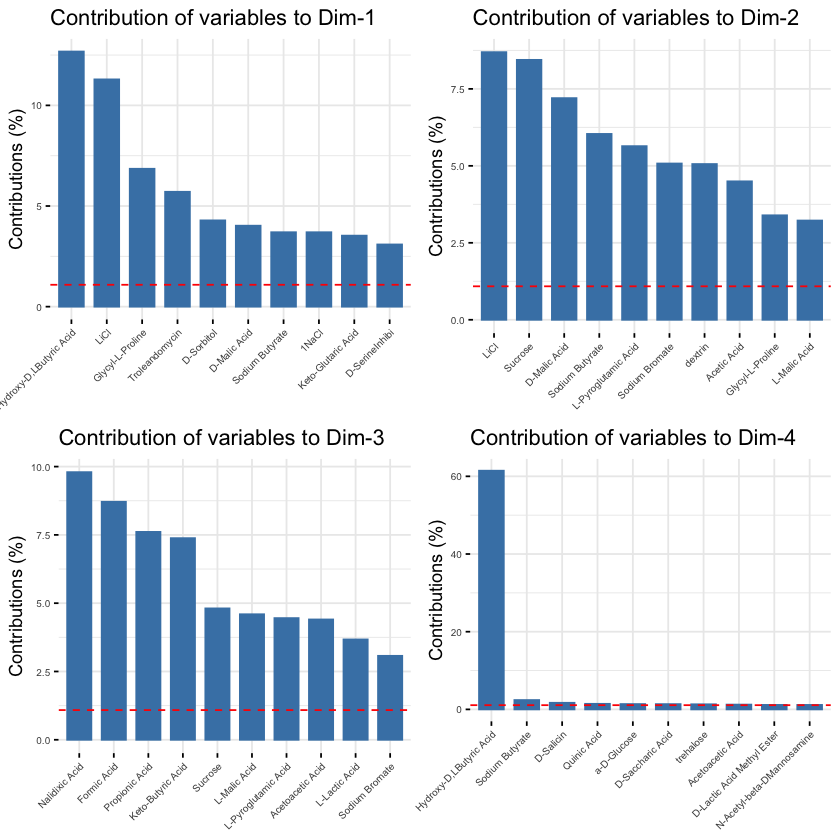

In [188]:
p1 = fviz_contrib(res.pca, choice = "var", axes =1, top = 10) + theme(axis.text=element_text(size=6))
p2 = fviz_contrib(res.pca, choice = "var", axes =2, top = 10) + theme(axis.text=element_text(size=6))
p3 = fviz_contrib(res.pca, choice = "var", axes =3, top = 10) + theme(axis.text=element_text(size=6))
p4 = fviz_contrib(res.pca, choice = "var", axes =4, top = 10) + theme(axis.text=element_text(size=6))
#pdf("607_Contributions.pdf")
plot_grid(p1, p2, p3,p4,labels = c('', '',"",""))
#dev.off()

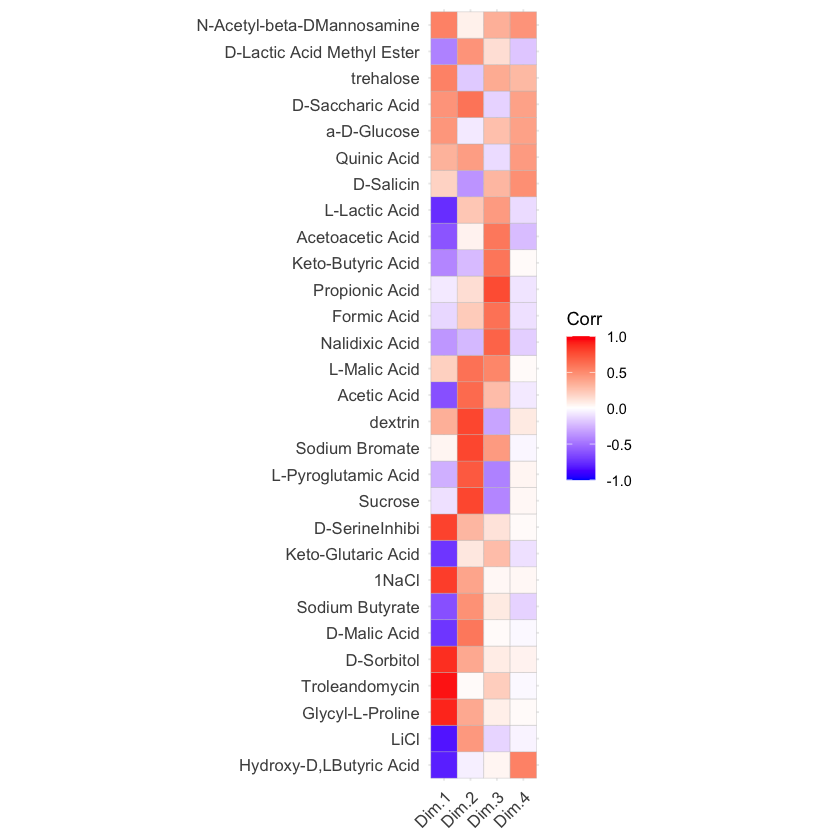

In [189]:
vint1 = p1$data %>% arrange(-contrib) %>% top_n(contrib,n=10)
vint2 = p2$data %>% arrange(-contrib) %>% top_n(contrib,n=10)
vint3 = p3$data %>% arrange(-contrib) %>% top_n(contrib,n=10)
vint4 = p4$data %>% arrange(-contrib) %>% top_n(contrib,n=10)
vintmes = unique(c(as.character(vint1$name),as.character(vint2$name),
                   as.character(vint3$name),as.character(vint4$name)))
correlacions = res.pca$var$cor[vintmes,1:4]
# Plot
#pdf("607_TopCorrelation.pdf")
ggcorrplot(t(correlacions), tl.cex  = 10)
#dev.off()

pdf 
  2

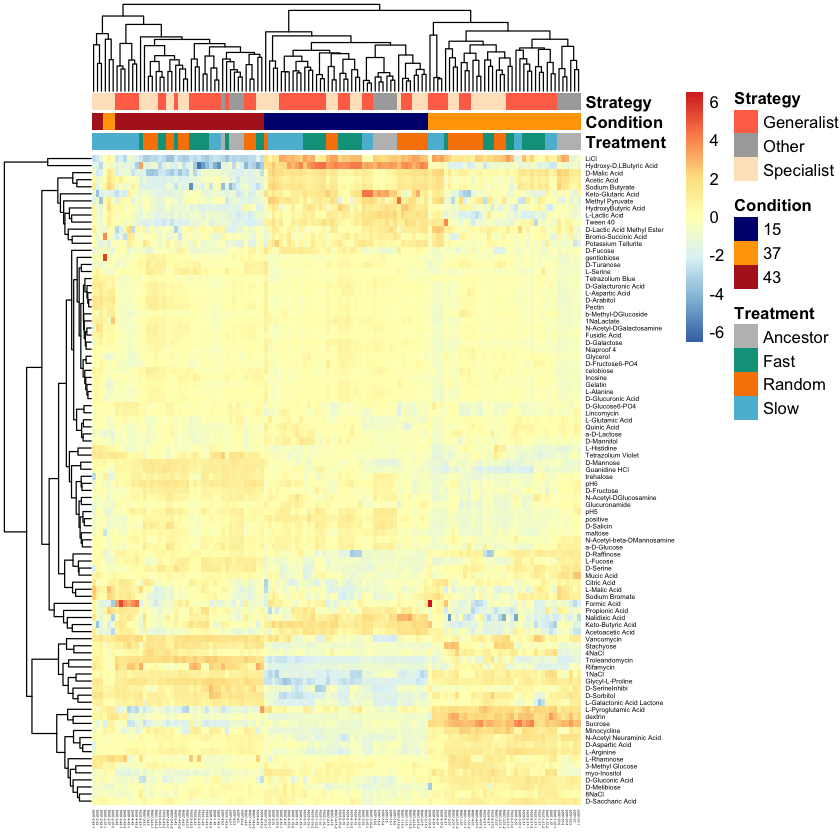

In [191]:
test2 = dat
annotations = as.data.frame(data607[,1:7])
rownames(annotations) = rownames(dat)
annotations = annotations[,5:7]
annotations$Condition = as.factor(annotations$Condition)
annotation_colors = list(Treatment = c(Ancestor="gray",Fast = "#00A08A", Random = '#F98400',Slow ='#5BBCD6'),
                         Condition = c(`15`="navy",`37`="orange",`43`="firebrick"),
                        Strategy = c(Generalist = "coral1",Other = "darkgray",Specialist = "bisque1"))

hmp = pheatmap(t(test2), scale = "column", annotation_col = annotations, 
         border_color = T,fontsize_row=4,fontsize_col=2, annotation_colors = annotation_colors)

save_pheatmap_pdf(hmp, filename = paste("607_hmp.pdf",sep=""))


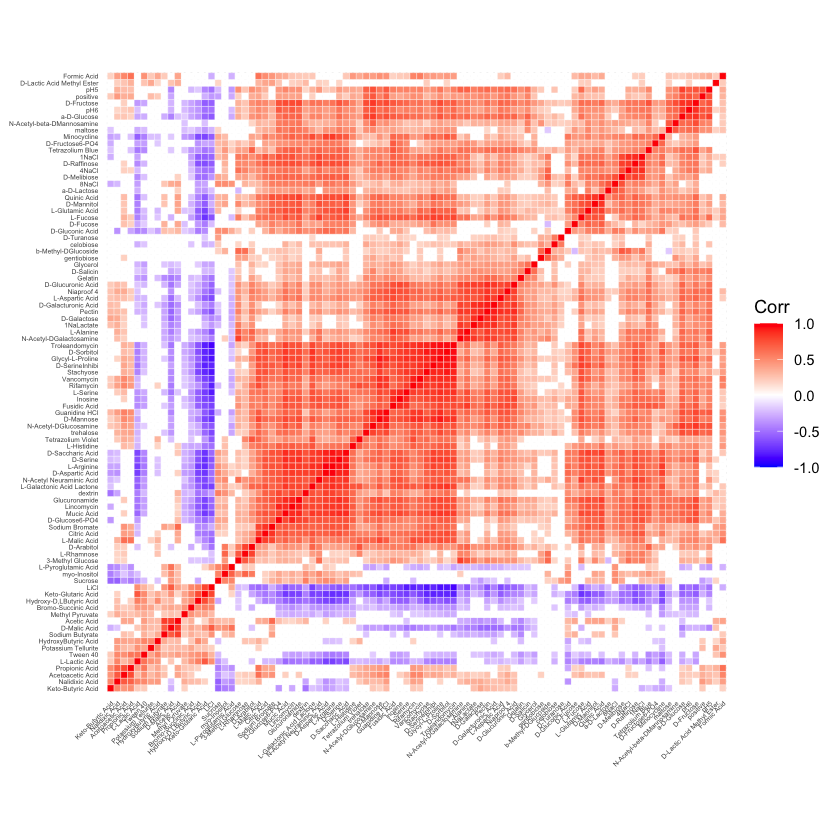

In [225]:
library(ggcorrplot)
corr = round(cor(dat), 2)
p.mat <- cor_pmat(dat)

ggcorrplot(corr, hc.order = TRUE,
     outline.col = "white",p.mat = p.mat,insig= "blank",tl.cex=4)